In [1]:
import pyisomme

# Occupant Load Criterion (OLC)

In [13]:
v11391 = pyisomme.Isomme().read("../data/nhtsa/11391/11391.mme", "10SEAT*ACXP")
v11391.print_channel_list()

Read Channel of 11391: 100%|██████████| 489/489 [00:00<00:00, 14826.97it/s]

11391 - Channel List:
	001	10SEATLERE00ACXP
	002	10SEATRIRE00ACXP
	003	10SEATLERE00ACXP
	004	10SEATRIRE00ACXP


In [3]:
print(v11391.test_info)

[('Data format edition number', 1.3), ('Laboratory name', 'CALSPAN'), ('Laboratory contact name', None), ('Laboratory contact phone', None), ('Laboratory contact fax', None), ('Laboratory contact email', None), ('Laboratory test ref. number', '03-4553-FR-01'), ('Customer name', 'NHTSA'), ('Customer test ref. number', 11391), ('Customer project ref. number', '693JJ919D000005'), ('Customer order number', None), ('Customer cost unit', None), ('Customer test engineer name', None), ('Customer test engineer phone', None), ('Customer test engineer fax', None), ('Customer test engineer email', None), ('Title', 'OPTIONAL NEW CAR ASSESSMENT PROGRAM FRONTAL BARRIE'), ('Medium No./number of media', None), ('Timestamp', datetime.datetime(2021, 7, 14, 3, 17, 10)), ('Type of the test', 'VEHICLE INTO BARRIER'), ('Reference temperature', 21), ('Relative air humidity', None), ('Date of the test', datetime.datetime(2021, 2, 12, 0, 0)), ('Number of test objects', 2), ('Comments', 'TO OBTAIN VEHICLE CRASHW

'10SEAT0OLC00VEXP' not a valid channel code
'10SEAT0OLC00VEXX' not a valid channel code


10SEAT0OLC00VEXX
10SEAT0OLC00VEXP


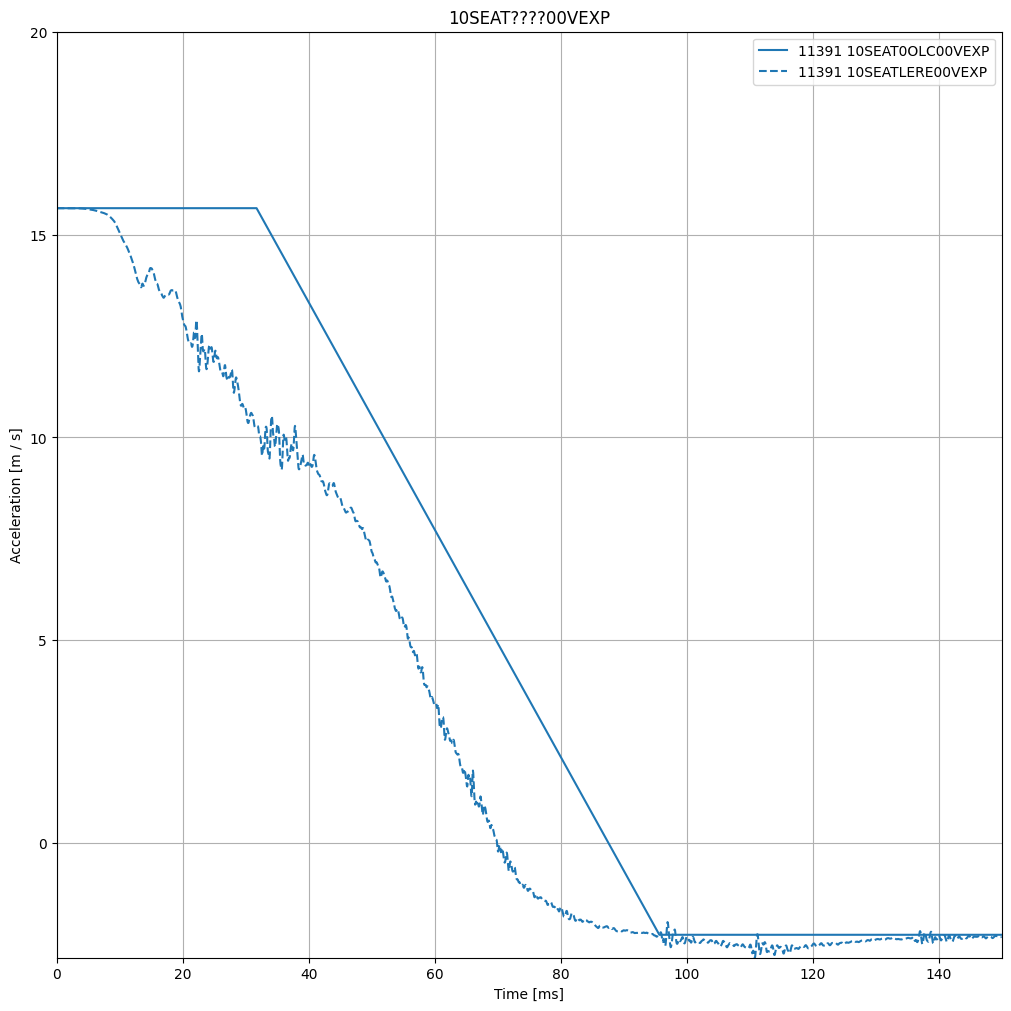

In [16]:
c_a = v11391.get_channel("10SEATLERE00ACXP")
c_v = c_a.integrate(15.65)

olc, c_olc = pyisomme.calculate_olc(c_v)

print(olc)
print(c_olc)

v11391.extend(c_v, c_olc)
fig = pyisomme.Plot_Line({v11391: [["10SEAT0OLC00VEXP", "10SEATLERE00VEXP"]]}, xlim=(0,150), ylim=(None,20))

# Head DAMAGE (Diffuse Axonal Multi-Axis General Evaluation)

In [6]:
v11391 = pyisomme.Isomme().read("../data/nhtsa/11391/11391.mme", "11HEAD*")
head_channels = v11391.get_channels("11HEAD*AV*")[:3]
head_channels = [x.cfc(60).differentiate() for x in head_channels]
v11391.extend(*pyisomme.calculate_damage(*head_channels))

v14065 = pyisomme.Isomme().read("../data/nhtsa/14065/14065.mme", "11HEAD*")
head_channels = v14065.get_channels("11HEAD*AV*")[:3]
head_channels = [x.cfc(60).differentiate() for x in head_channels]
v14065.extend(*pyisomme.calculate_damage(*head_channels))

Read Channel of 11391: 100%|██████████| 489/489 [00:00<00:00, 9312.25it/s]
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00AAYD' not a valid channel code
'11HEADDAMA00AAZD' not a valid channel code
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00AAYD' not a valid channel code
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00AAZD' not a valid channel code
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00AAXX' not a valid channel code
'11HEADDAMA00AAYX' not a valid channel code
'11HEADDAMA00AAZX' not a valid channel code
'11HEADDAMA00AARX' not a valid channel code
Read Channel of 14065: 100%|██████████| 487/487 [00:00<00:00, 4503.02it/s]
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00AAYD' not a valid channel code
'11HEADDAMA00AAZD' not a valid channel code
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00AAYD' not a valid channel code
'11HEADDAMA00AAXD' not a valid channel code
'11HEADDAMA00A

Isomme(14065)

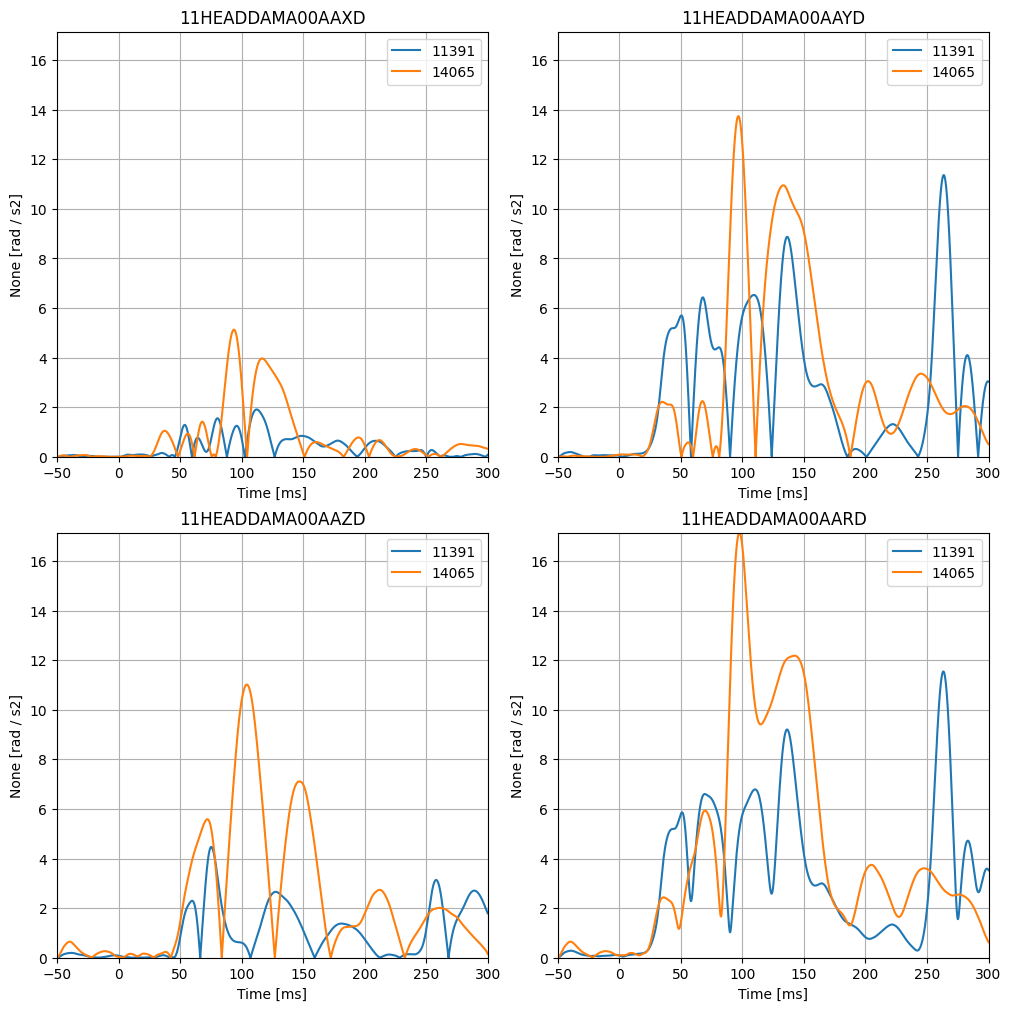

In [11]:
pyisomme.Plot_Line({v11391: [["11HEADDAMA????X?"], ["11HEADDAMA????Y?"], ["11HEADDAMA????Z?"], ["11HEADDAMA????R?"]], 
                    v14065: [["11HEADDAMA????X?"], ["11HEADDAMA????Y?"], ["11HEADDAMA????Z?"], ["11HEADDAMA????R?"]]}, 2, 2, sharey=True)